<a href="https://colab.research.google.com/github/piyushvishwakarma01/AI-Labs/blob/main/LAB_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to Colab!

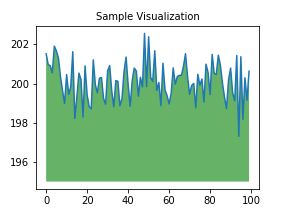

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

For example, if you find yourself waiting for **pandas** code to finish running and want to go faster, you can switch to a GPU Runtime and use libraries like [RAPIDS cuDF](https://rapids.ai/cudf-pandas) that provide zero-code-change acceleration.

To learn more about accelerating pandas on Colab, see the [10 minute guide](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb) or
 [US stock market data analysis demo](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb).

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning

<div>

These are a few of the notebooks related to Machine Learning, including Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Intro to RAPIDS cuDF to accelerate pandas](https://nvda.ws/rapids-cudf)
- [Getting Started with cuML's accelerator mode](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cuml_sklearn_colab_demo.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TPUs in Colab](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.


In [2]:
# One wall in the grid and two terminal (end) states
wall = [(1, 1)]
terminal_states = ((1, 3), (2, 3))

# If the agent doesn't move in the direction it intended,
# the environment may push it to a perpendicular direction
environment_left = {'L': 'D', 'R': 'U', 'U': 'L', 'D': 'R'}
environment_right = {'L': 'U', 'R': 'D', 'U': 'R', 'D': 'L'}

# Check if a given (row, column) cell is valid inside the grid
def is_valid(i, j):
    return (i, j) not in wall and 0 <= i < 3 and 0 <= j < 4

# Nicely prints the value function in grid format
def print_values(V):
    for i in range(2, -1, -1):
        print()
        for j in range(4):
            print(" %.2f |" % V[i][j], end="")
        print()

# Returns the new state after taking an action
def transition(action, i, j):
    if action == 'L':  return (i, j - 1)
    if action == 'R':  return (i, j + 1)
    if action == 'U':  return (i + 1, j)
    if action == 'D':  return (i - 1, j)
    return (-1, -1)

# Computes the expected value of being at state (i, j)
# based on the current policy
def value_function(i, j, reward, reward_matrix, discount_factor=1):
    total_value = 0

    # The policy selects each action uniformly (0.25 probability)
    for action in ['L', 'R', 'U', 'D']:

        # 0.8 probability → intended action
        nx, ny = transition(action, i, j)
        if is_valid(nx, ny):
            desired = reward_matrix[nx][ny] + discount_factor * V_pie[nx][ny]
        else:
            desired = reward_matrix[i][j] + discount_factor * V_pie[i][j]

        # 0.1 probability → environment pushes left
        nx, ny = transition(environment_left[action], i, j)
        if is_valid(nx, ny):
            left = reward_matrix[nx][ny] + discount_factor * V_pie[nx][ny]
        else:
            left = reward_matrix[i][j] + discount_factor * V_pie[i][j]

        # 0.1 probability → environment pushes right
        nx, ny = transition(environment_right[action], i, j)
        if is_valid(nx, ny):
            right = reward_matrix[nx][ny] + discount_factor * V_pie[nx][ny]
        else:
            right = reward_matrix[i][j] + discount_factor * V_pie[i][j]

        # Expected value of this action
        expected_value = (0.8 * desired) + (0.1 * left) + (0.1 * right)

        # Add weighted value (since each action is chosen with 0.25)
        total_value += 0.25 * expected_value

    return total_value

# Repeatedly evaluates V(s) until it converges
def iterative_policy_evaluation(iter_count, epsilon, reward, reward_matrix, V_pie):
    while True:
        delta = 0

        for i in range(3):
            for j in range(4):

                if (i, j) in terminal_states or (i, j) in wall:
                    continue

                old_value = V_pie[i][j]
                V_pie[i][j] = value_function(i, j, reward, reward_matrix)

                delta = max(delta, abs(old_value - V_pie[i][j]))

        iter_count += 1

        if delta < epsilon:
            print(f"Converged after {iter_count} iterations.")
            break

    print_values(V_pie)

# Creates a reward matrix filled with the default reward,
# but assigns +1 and -1 for terminal states
def update_reward_matrix(reward):
    matrix = [[reward for _ in range(4)] for _ in range(3)]
    matrix[2][3] = 1    # Positive terminal
    matrix[1][3] = -1   # Negative terminal
    return matrix

# Initializes V(s) = 0 everywhere
def initialize_V_pie():
    return [[0 for _ in range(4)] for _ in range(3)]


In [3]:
# Different reward values to test
rewards = [-0.04, -2, 0.1, 0.02, 1]

# Convergence threshold
epsilon = 1e-8

print("Value functions for the optimal policy:\n")

for reward in rewards:
    print(f"Running policy evaluation for r(S) = {reward} ...")

    # Create the reward matrix based on the current reward
    reward_matrix = update_reward_matrix(reward)

    # Initialize V(s) = 0 for all states
    V_pie = initialize_V_pie()

    # Perform iterative policy evaluation
    iterative_policy_evaluation(
        iter_count=0,
        epsilon=epsilon,
        reward=reward,
        reward_matrix=reward_matrix,
        V_pie=V_pie
    )

    print("\n")


Value functions for the optimal policy:

Running policy evaluation for r(S) = -0.04 ...
Converged after 312 iterations.

 -1.23 | -0.83 | -0.28 | 0.00 |

 -1.47 | 0.00 | -0.87 | 0.00 |

 -1.55 | -1.47 | -1.22 | -1.17 |


Running policy evaluation for r(S) = -2 ...
Converged after 384 iterations.

 -59.71 | -46.01 | -24.32 | 0.00 |

 -65.41 | 0.00 | -21.94 | 0.00 |

 -63.10 | -52.80 | -34.49 | -20.75 |


Running policy evaluation for r(S) = 0.1 ...
Converged after 324 iterations.

 2.95 | 2.39 | 1.44 | 0.00 |

 3.10 | 0.00 | 0.63 | 0.00 |

 2.85 | 2.20 | 1.15 | 0.23 |


Running policy evaluation for r(S) = 0.02 ...
Converged after 284 iterations.

 0.56 | 0.55 | 0.46 | 0.00 |

 0.49 | 0.00 | -0.23 | 0.00 |

 0.34 | 0.11 | -0.20 | -0.57 |


Running policy evaluation for r(S) = 1 ...
Converged after 370 iterations.

 29.80 | 23.14 | 12.48 | 0.00 |

 32.46 | 0.00 | 10.30 | 0.00 |

 31.11 | 25.77 | 16.43 | 9.22 |




In [4]:
import seaborn as sns
import numpy as np

from scipy.stats import poisson
import numpy as np



In [5]:
class Poisson:
    # Caches to avoid recomputing values for the same μ
    cache_pmf = {}
    cache_sf = {}
    cache = {}
    MAX_CUTOFF = 25

    @classmethod
    def pmf_series(cls, mu, cutoff):
        # Basic type checks
        assert isinstance(mu, int), "mu must be an integer."
        assert isinstance(cutoff, int), "cutoff must be an integer."

        # If this (mu, cutoff) pair was computed earlier, reuse it
        if (mu, cutoff) in cls.cache:
            return cls.cache[(mu, cutoff)]

        # If PMF and survival function haven't been computed for this mu yet,
        # calculate and store them for future reuse
        if mu not in cls.cache_pmf:
            print("Calculating Poisson distribution values...")
            cls.cache_pmf[mu] = poisson.pmf(np.arange(cls.MAX_CUTOFF + 1), mu)
            cls.cache_sf[mu] = poisson.sf(np.arange(cls.MAX_CUTOFF + 1), mu)

        # Copy up to the cutoff index
        values = np.copy(cls.cache_pmf[mu][:cutoff + 1])

        # Add tail probability to the last element
        values[-1] += cls.cache_sf[mu][cutoff]

        # Store in cache for faster future calls
        cls.cache[(mu, cutoff)] = values

        return values


Calculating Poisson distribution values...
Calculating Poisson distribution values...
Calculating Poisson distribution values...
193.34904927512346
134.0042608644998
90.45243773749041
67.59779106615531
53.584930617584405
41.72086291128676
32.72010939685839
26.087556138177888
21.778143392699917
18.318059790332995
15.3674063477024
12.861027123617134
10.73928669081539
8.949004145272966
7.443128433756556
6.180206266078358
5.123897292162326
4.2425403472451535
3.5087368683560385
2.8989345554257966
2.3930120440830365
1.9738735796704532
1.6270638320042963
1.340410800753034
1.1037016637394004
0.9083935811093511
0.7473592909607305
0.6146658513113152
0.5053839897119587
0.41542507105890536
0.3414025532432561
0.2805148621152398
0.23044680201434176
0.18928686930166805
0.15545811562617473
0.12766049026475912
0.10482286156786813
0.0860631678037862
0.07065537333375005
0.058002105893820044
0.04761202529920183
0.03908112472913672
0.03207729501525591
0.026327592373320385
0.021607743132278756
0.01773349747

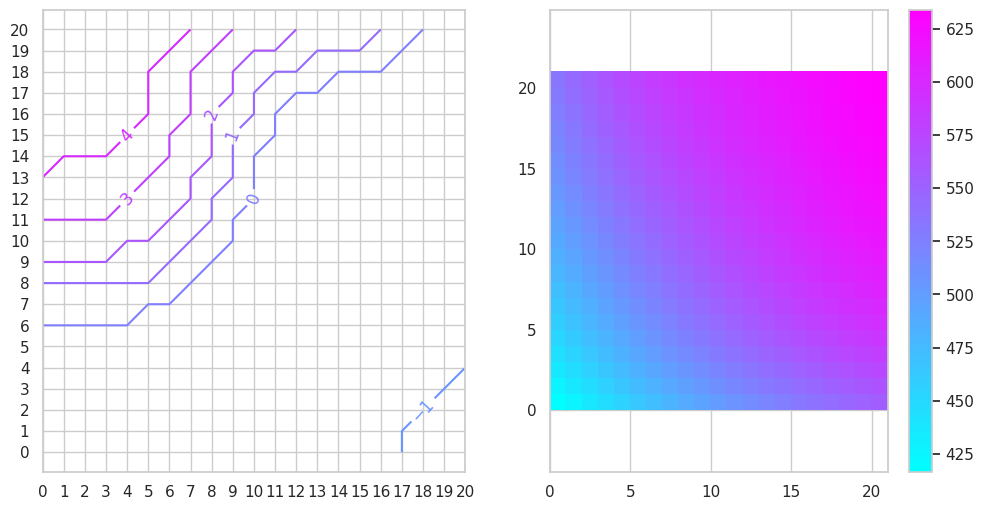

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


class PolicyIterationSolver:
    """
    A solver for the classic two-location G-Bike rental problem
    (similar to Jack’s Car Rental from Sutton & Barto),
    implemented using policy iteration.
    """

    # Environment parameters
    capacity = 20
    rental_reward = 10.0
    moving_cost = 2.0
    max_moving = 5

    # Cost assigned when an action attempts to move more bikes
    # than what is physically available. A value of 0 means
    # we simply cap the move instead of punishing it.
    bad_action_cost = 100.0

    # Poisson means for rental requests and returns
    request_mean_G1 = 3
    request_mean_G2 = 4
    return_mean_G1 = 3
    return_mean_G2 = 2

    discount = 0.9
    PolicyEvaluationError = 0.01

    def __init__(self):
        # Policy: for each (s1, s2), store move action (from -5 to +5)
        self.policy = np.zeros([self.capacity + 1] * 2, dtype=int)

        # Value table V(s)
        self.value = np.zeros([self.capacity + 1] * 2)

        # Precompute expected rental rewards for both stations
        self._reward1 = self.expected_rental_reward(self.request_mean_G1)
        self._reward2 = self.expected_rental_reward(self.request_mean_G2)

        assert self.bad_action_cost >= 0


    def bellman(self, action, s1, s2):
        # Transition distributions for each station
        p1 = self.transition_probability(s1, self.request_mean_G1, self.return_mean_G1, -action)
        p2 = self.transition_probability(s2, self.request_mean_G2, self.return_mean_G2, action)

        # Joint probability table
        joint_p = np.outer(p1, p2)

        # Bellman equation
        expected_future = np.sum(joint_p * self.value)
        return (
            self._reward1[s1]
            + self._reward2[s2]
            - self.expected_moving_cost(s1, s2, action)
            + self.discount * expected_future
        )

    def policy_evaluation(self):
        """
        Evaluates the value function for the current policy
        until convergence.
        """
        while True:
            diff = 0
            it = np.nditer([self.policy], flags=["multi_index"])

            while not it.finished:
                action = it[0]
                s1, s2 = it.multi_index
                old_val = self.value[s1, s2]

                self.value[s1, s2] = self.bellman(action, s1, s2)
                diff = max(diff, abs(self.value[s1, s2] - old_val))

                it.iternext()

            print(diff)
            if diff < self.PolicyEvaluationError:
                break


    def policy_update(self):
        """Improves policy greedily w.r.t. current value function."""
        policy_changed = False
        it = np.nditer([self.policy], flags=["multi_index"])

        while not it.finished:
            s1, s2 = it.multi_index

            best_val = -float("inf")
            best_act = None

            # Try every possible move action
            for act in range(-self.max_moving, self.max_moving + 1):
                val = self.bellman(act, s1, s2)
                if val > best_val:
                    best_val = val
                    best_act = act

            if self.policy[s1, s2] != best_act:
                policy_changed = True
                self.policy[s1, s2] = best_act

            it.iternext()

        return policy_changed


    def expected_moving_cost(self, s1, s2, action):
        if action == 0:
            return 0.0

        if action > 0:
            # Moving bikes from station 1 → station 2
            p = self.transition_probability(s1, self.request_mean_G1, self.return_mean_G1)
        else:
            # Moving bikes from station 2 → station 1
            p = self.transition_probability(s2, self.request_mean_G2, self.return_mean_G2)

        cost_array = self._gen_move_cost_array(action)
        return cost_array.dot(p)

    def _gen_move_cost_array(self, action):
        """
        Returns an array representing the cost of moving bikes.
        If an action is not feasible, applies a penalty if enabled.
        """
        a = abs(action)

        if self.bad_action_cost == 0:
            # No penalty, just cap by available bikes
            cost = np.array([min(i, a) for i in range(self.capacity + 1)]) * self.moving_cost
        else:
            # Penalize impossible moves
            cost = np.array([
                self.bad_action_cost if i < a else a
                for i in range(self.capacity + 1)
            ]) * self.moving_cost

        return cost


    @classmethod
    def expected_rental_reward(cls, mu):
        return np.array([cls._state_reward(s, mu) for s in range(cls.capacity + 1)])

    @classmethod
    def _state_reward(cls, s, mu):
        rewards = cls.rental_reward * np.arange(s + 1)
        p = Poisson.pmf_series(mu, cutoff=s)
        return rewards.dot(p)


    def transition_probability(self, s, req_mu, ret_mu, action=0):
        """
        Returns probability distribution for next state given s and action.
        """

        max_r = self.max_moving + self.capacity

        p_req = Poisson.pmf_series(req_mu, cutoff=s)
        p_ret = Poisson.pmf_series(ret_mu, cutoff=max_r)

        matrix = np.outer(p_req, p_ret)
        transp = np.array([matrix.trace(offset) for offset in range(-s, max_r + 1)])

        assert abs(action) <= self.max_moving, f"Action exceeds allowed limit {self.max_moving}"

        # Case 1: No bike movement
        if action == 0:
            transp[20] += transp[21:].sum()
            return transp[:21]

        # Case 2: Moving bikes from station 1 → station 2
        if action > 0:
            transp[self.capacity - action] += transp[self.capacity - action + 1:].sum()
            transp[self.capacity - action + 1:] = 0
            return np.roll(transp, action)[:self.capacity + 1]

        # Case 3: Moving bikes from station 2 → station 1
        action = -action
        transp[action] += transp[:action].sum()
        transp[:action] = 0

        transp[action + self.capacity] += transp[action + self.capacity + 1:].sum()
        transp[action + self.capacity + 1:] = 0

        return np.roll(transp, -action)[:self.capacity + 1]


    def policy_iteration(self):
        """Runs full policy iteration until convergence."""
        self.policy_evaluation()
        while self.policy_update():
            self.policy_evaluation()




sns.set(style="whitegrid")
sns.set_palette("cool")

solver = PolicyIterationSolver()

# Run several rounds of policy evaluation + update
for _ in range(4):
    solver.policy_evaluation()
    solver.policy_update()

# Plot policy and value function
plt.figure(figsize=(12, 6))

# Policy plot
plt.subplot(121)
CS = plt.contour(solver.policy, levels=range(-6, 7), cmap='cool')
plt.clabel(CS)
plt.xlim([0, 20])
plt.ylim([0, 20])
plt.axis("equal")
plt.xticks(range(21))
plt.yticks(range(21))
plt.grid(True)

# Value plot
plt.subplot(122)
plt.pcolor(solver.value, cmap='cool')
plt.colorbar()
plt.axis("equal")

plt.show()


193.3490492751235
134.00426086449983
90.45243773749047
67.59779106615537
53.584930617584064
41.72086291128721
32.72010939685782
26.087556138178172
21.778143392699917
18.31805979033311
15.367406347701888
12.86102712361668
10.739286690815732
8.949004145272568
7.443128433756954
6.180206266078471
5.123897292162269
4.242540347244983
3.5087368683560953
2.8989345554259103
2.393012044082809
1.973873579670851
1.6270638320038415
1.3404108007534319
1.103701663738775
0.9083935811098627
0.747359290960901
0.6146658513105194
0.5053839897123567
0.4154250710594738
0.34140255324280133
0.2805148621151261
0.2304468020147965
0.1892868693017249
0.15545811562594736
0.1276604902645886
0.10482286156803866
0.0860631678041841
0.0706553733336932
0.05800210589359267
0.04761202529920183
0.0390811247288525
0.03207729501582435
0.02632759237292248
0.021607743132562973
0.017733497475092008
0.01455351005540706
0.011943480427248687
0.009801332242659555
53.51739464589684
6.1734677086436704
3.1669552535425964
2.45798444778

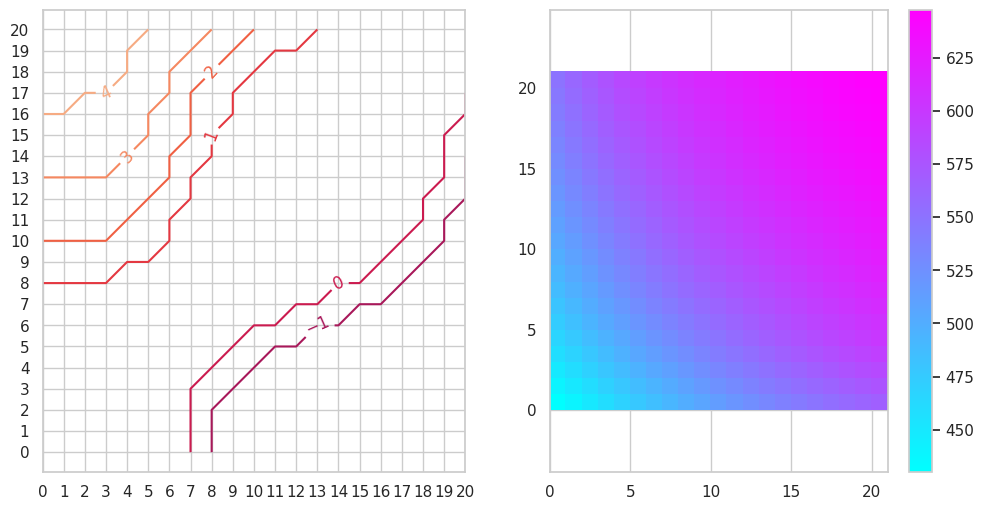

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class PolicyIterationSolver(object):

    capacity = 20
    rental_reward = 10.
    moving_cost = 2.
    max_moving = 5
    parking_cost = 4.

    # bad_action_cost should always non-negative.
    # when bad_action_cost == 0, bad action is not punished, otherwise bad action is published according to value
    # set here.
    # bad_action_cost = 0
    bad_action_cost = 100.

    request_mean_G1 = 3
    request_mean_G2 = 4
    return_mean_G1 = 3
    return_mean_G2 = 2

    discount = 0.9

    PolicyEvaluationError = 0.01

    policy = None
    value = None

    def __init__(self):
        self.policy = np.zeros([self.capacity + 1]*2, int)
        self.value = np.zeros([self.capacity + 1]*2)

        self._reward1 = self.expected_rental_reward(self.request_mean_G1)
        self._reward2 = self.expected_rental_reward(self.request_mean_G2)

        assert self.bad_action_cost >= 0

    def bellman(self, action, s1, s2):
        transp1 = self.transition_probabilty(s1, self.request_mean_G1, self.return_mean_G1, -action)
        transp2 = self.transition_probabilty(s2, self.request_mean_G2, self.return_mean_G2, action)
        transp = np.outer(transp1, transp2)

        return self._reward1[s1] + self._reward2[s2] - self.expected_moving_cost(s1, s2, action) + \
               self.discount * sum((transp * self.value).flat)

    # policy evaluation
    def policy_evaluation(self):
        ''' Keep pocliy fixed and update value. '''
        while True:
            diff = 0.
            it = np.nditer([self.policy], flags=['multi_index'])

            while not it.finished:
                action = it[0]
                s1, s2 = it.multi_index

                _temp = self.value[s1, s2]

                self.value[s1, s2] = self.bellman(action=action, s1=s1, s2=s2)

                diff = max(diff, abs(self.value[s1, s2] - _temp))

                it.iternext()

            print(diff)
            if diff < self.PolicyEvaluationError:
                break

    def policy_update(self):
        is_policy_changed = False

        it = np.nditer([self.policy], flags=['multi_index'])
        while not it.finished:
            s1, s2 = it.multi_index

            _max_val = -1
            _pol = None

            for act in range(-self.max_moving, self.max_moving + 1):
                _val = self.bellman(action=act, s1=s1, s2=s2)
                if _val > _max_val:
                    _max_val = _val
                    _pol = act

            if self.policy[s1, s2] != _pol:
                is_policy_changed = True
                self.policy[s1, s2] = _pol

            it.iternext()

        return is_policy_changed

    def expected_moving_cost(self, s1, s2, action):
        if action == 0:
            return 0.

        # moving from state s1 into state s2
        if action > 0:
            p = self.transition_probabilty(s1, self.request_mean_G1, self.return_mean_G1)
            cost = self._gen_move_cost_array(action)
            if action > 10:
              cost += self.parking_cost * (action - 10)
            return cost.dot(p)

        # moving from state s2 into state s1
        p = self.transition_probabilty(s2, self.request_mean_G2, self.return_mean_G2)
        cost = self._gen_move_cost_array(action)
        if action > 10:
            cost += self.parking_cost * (action - 10)
        return cost.dot(p)

    def _gen_move_cost_array(self, action):
        '''
        Generate an array based on which costs of move is calculated.

        If action > available GBikes, then this action is considered as a bad action.

        when self.bad_move_cost == 0, bad action is not punished. The system will move max possible GBikes.

        When self.bad_move_cost >0, bad action is punished indicated by this variable.

        :param action: Number of GBikes that will be moved from station 1 to station 2.
        :return:
        '''
        _action = abs(action)

        if _action != 0:
          _action -= 1

        # Don't punish bad action:
        if self.bad_action_cost == 0:
            cost = np.asarray(
                [ii if ii < _action else _action for ii in range(self.capacity+1)]
            ) * self.moving_cost

        # bad action is punished
        else:
            cost = np.asarray(
                [self.bad_action_cost if ii < _action else _action for ii in range(self.capacity + 1)]
            ) * self.moving_cost
        return cost


    @classmethod
    def expected_rental_reward(cls, expected_request):
        return np.asarray([cls._state_reward(s, expected_request) for s in range(cls.capacity + 1)])

    @classmethod
    def _state_reward(cls, s, mu):
        rewards = cls.rental_reward * np.arange(s + 1)
        p = Poisson.pmf_series(mu, cutoff=s)
        return rewards.dot(p)

    def transition_probabilty(self, s, req, ret, action=0):
        '''
        :param s: Current State
        :param req: Mean value of requests
        :param ret: Mean value of returns
        :param action: Action. Positive means move in. Negative means move out.
        :return: Transition probability.
        '''

        _ret_sz = self.max_moving + self.capacity

        p_req = Poisson.pmf_series(req, s)
        p_ret = Poisson.pmf_series(ret, _ret_sz)
        p = np.outer(p_req, p_ret)

        transp = np.asarray([p.trace(offset) for offset in range(-s, _ret_sz + 1)])

        assert abs(action) <= self.max_moving, "action can be large than %s." % self.max_moving

        # No GBikes are being moved
        if action == 0:
            transp[20] += sum(transp[21:])
            return transp[:21]

        # Move GBikes from station 1 to station 2
        if action > 0:
            transp[self.capacity-action] += sum(transp[self.capacity-action+1:])
            transp[self.capacity-action+1:] = 0

            return np.roll(transp, shift=action)[:self.capacity+1]

        # Move GBikes from station 2 to station 1
        action = -action
        transp[action] += sum(transp[:action])
        transp[:action] = 0

        transp[action+self.capacity] += sum(transp[action+self.capacity+1:])
        transp[action+self.capacity+1:] = 0

        return np.roll(transp, shift=-action)[:self.capacity+1]

    def policy_iteration(self):
        '''
        Caveat: the situation where the policy continually switches between two or more policies that are equally good is not considered yet.
        :return:
        '''
        self.policy_evaluation()
        while self.policy_update():
            self.policy_evaluation()




# Initialize Seaborn and set the color palette
sns.set_palette("cool")  # You can choose any Seaborn palette, like "cool", "muted", "deep", etc.

# Create an instance of PolicyIterationSolver
solver = PolicyIterationSolver()

# Perform policy iteration
for _ in range(4):
    solver.policy_evaluation()
    solver.policy_update()

# Plot policy and value
plt.figure(figsize=(12, 6))

plt.subplot(121)
CS = plt.contour(solver.policy, levels=range(-6, 7))
plt.clabel(CS)
plt.xlim([0, 20])
plt.ylim([0, 20])
plt.axis('equal')
plt.xticks(range(21))
plt.yticks(range(21))
plt.grid(True)

plt.subplot(122)
plt.pcolor(solver.value, cmap='cool')  # Use 'cool' colormap from Seaborn
plt.colorbar()
plt.axis('equal')

plt.show()